plots of SOG model run
- 1100 x 10 x 101 domain
- 1 day
- river on

In [1]:
import os
import re
import netCDF4 as nc

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
f=nc.Dataset('/data/eolson/MEOPAR/SS36runs/runSOG2d_check/SOG2D_1h_20041019_20041020_ptrc_T.nc')
f2=nc.Dataset('/data/eolson/MEOPAR/SS36runs/runSOG2d_check/SOG2D_1h_20041019_20041020_grid_T.nc')
fkeys=f.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
z=f.variables[zkey][:]
t=f.variables['time_counter'][:]
xx,zz=np.meshgrid(lons,-z[:])
e=int(len(t))#/4)
tt,tz=np.meshgrid(t[0:e],-z[:])
xt,yt=np.meshgrid(lons,lats)
f3=nc.Dataset('/data/eolson/MEOPAR/SS36runs/runSOG2d_exp/mesh_mask.nc')


In [3]:
#print(f3.variables)
print(f2.variables)

OrderedDict([('nav_lat', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lat(y, x)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    nav_model: grid_T
unlimited dimensions: 
current shape = (10, 1100)
filling off
), ('nav_lon', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    nav_model: grid_T
unlimited dimensions: 
current shape = (10, 1100)
filling off
), ('deptht', <class 'netCDF4._netCDF4.Variable'>
float32 deptht(deptht)
    long_name: Vertical T levels
    units: m
    axis: Z
    positive: down
    bounds: deptht_bounds
unlimited dimensions: 
current shape = (101,)
filling off
), ('deptht_bounds', <class 'netCDF4._netCDF4.Variable'>
float32 deptht_bounds(deptht, axis_nbounds)
unlimited dimensions: 
current shape = (101, 2)
filling off
), ('sossheig', <class 'netCDF4._netCDF4.Variable'>
float32 sossheig(time_counter, y, x)
    standard_name: sea_surface_height

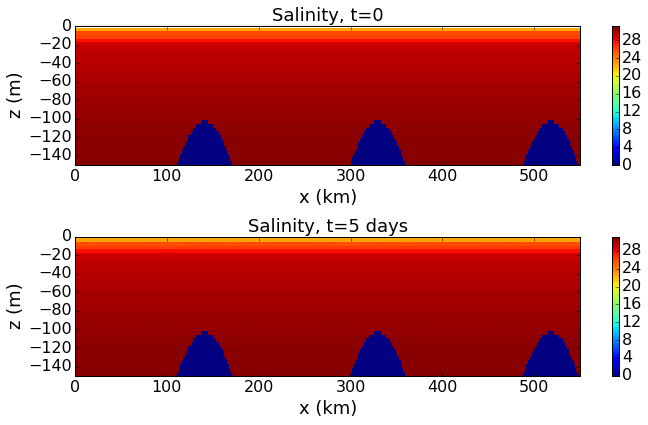

In [4]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
mesh0=axs[0].pcolormesh(xx,zz,f2.variables['vosaline'][0,:,5,:])
cb0=fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)', fontsize=18)
axs[0].set_xlabel('x (km)', fontsize=18)
axs[0].set_title('Salinity, t=0', fontsize=18)
#axs[0].autoscale(tight='True')
axs[0].axis([0, 550, -150, 0])
plt.setp(axs[0].get_xticklabels(),fontsize=16)
plt.setp(axs[0].get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)

mesh1=axs[1].pcolormesh(xx,zz,f2.variables['vosaline'][e-1,:,5,:])
cb1=fig.colorbar(mesh1,ax=axs[1])
axs[1].set_ylabel('z (m)', fontsize=18)
axs[1].set_xlabel('x (km)', fontsize=18)
axs[1].set_title('Salinity, t=5 days', fontsize=18)
#axs[1].autoscale(tight='True')
axs[1].axis([0, 550, -150, 0])
plt.setp(axs[1].get_xticklabels(),fontsize=16)
plt.setp(axs[1].get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)
plt.tight_layout()

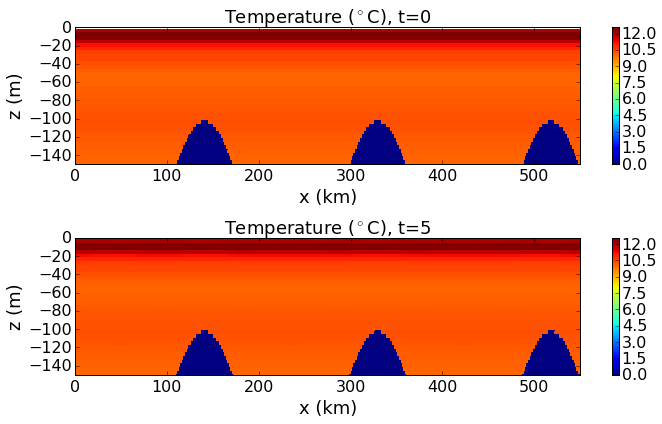

In [5]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
mesh0=axs[0].pcolormesh(xx,zz,f2.variables['votemper'][0,:,5,:])
cb0=fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)', fontsize=18)
axs[0].set_xlabel('x (km)', fontsize=18)
axs[0].set_title('Temperature ($^\circ$C), t=0', fontsize=18)
#axs[0].autoscale(tight='True')
axs[0].axis([0, 550, -150, 0])
plt.setp(axs[0].get_xticklabels(),fontsize=16)
plt.setp(axs[0].get_yticklabels(),fontsize=16)
cb0.ax.tick_params(labelsize=16)

mesh1=axs[1].pcolormesh(xx,zz,f2.variables['votemper'][e-1,:,5,:])#-f2.variables['votemper'][0,:,5,:]
cb1=fig.colorbar(mesh1,ax=axs[1])
axs[1].set_ylabel('z (m)', fontsize=18)
axs[1].set_xlabel('x (km)', fontsize=18)
axs[1].set_title('Temperature ($^\circ$C), t=5', fontsize=18)
#axs[1].autoscale(tight='True')
axs[1].axis([0, 550, -150, 0])
plt.setp(axs[1].get_xticklabels(),fontsize=16)
plt.setp(axs[1].get_yticklabels(),fontsize=16)
cb1.ax.tick_params(labelsize=16)
plt.tight_layout()

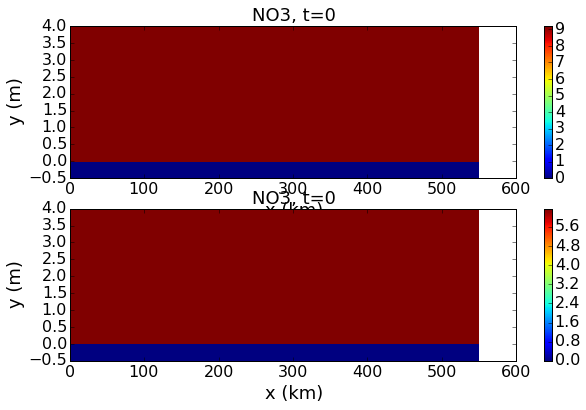

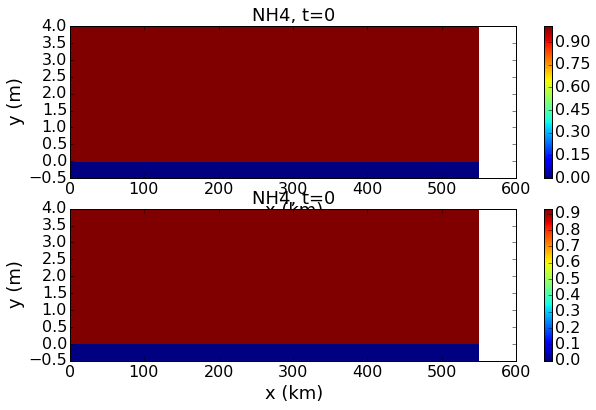

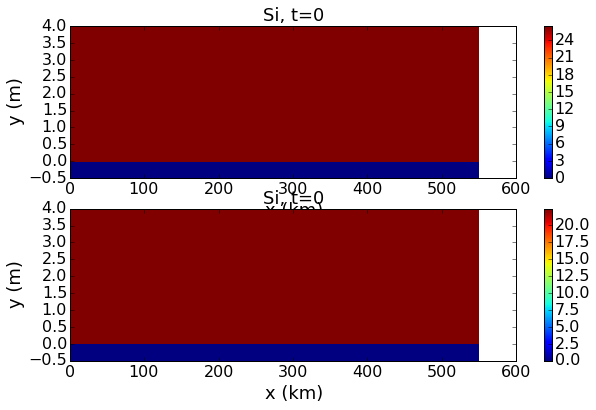

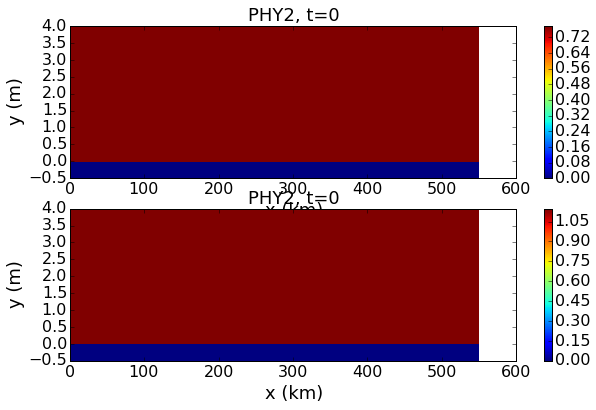

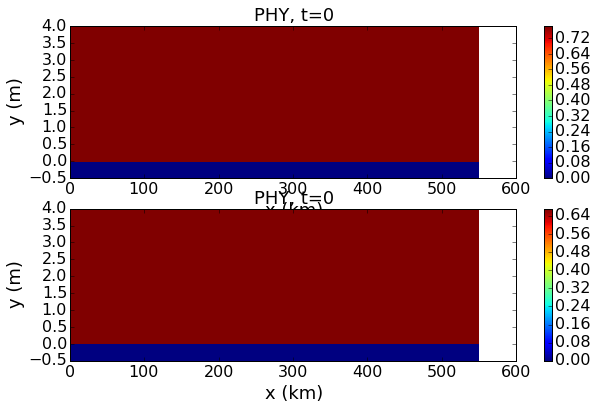

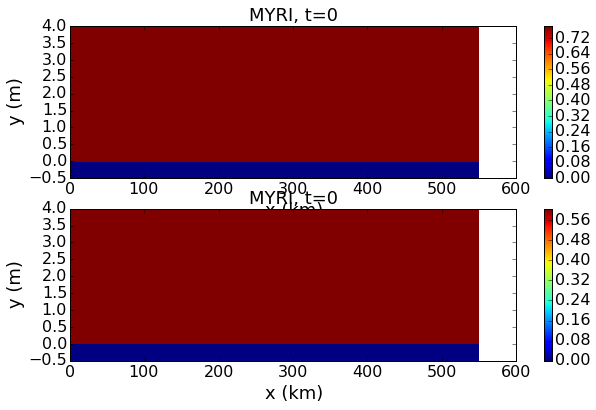

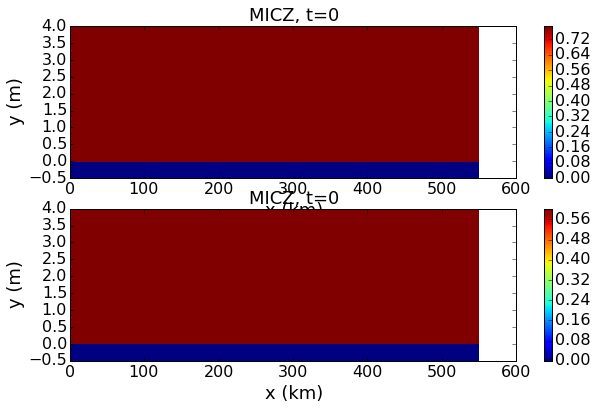

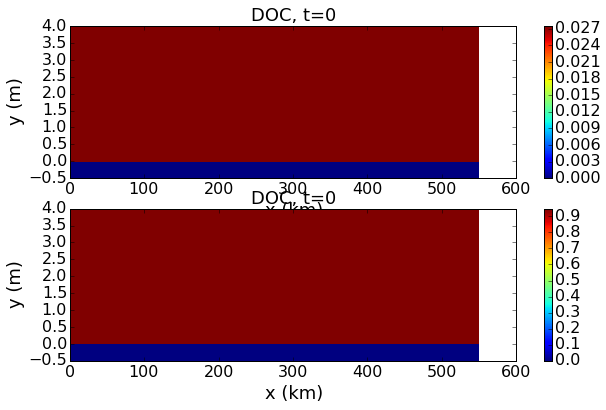

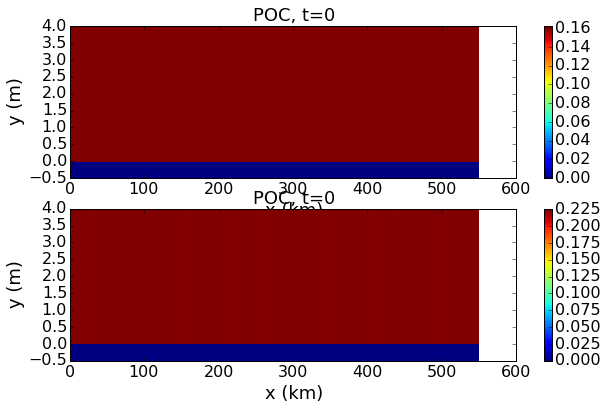

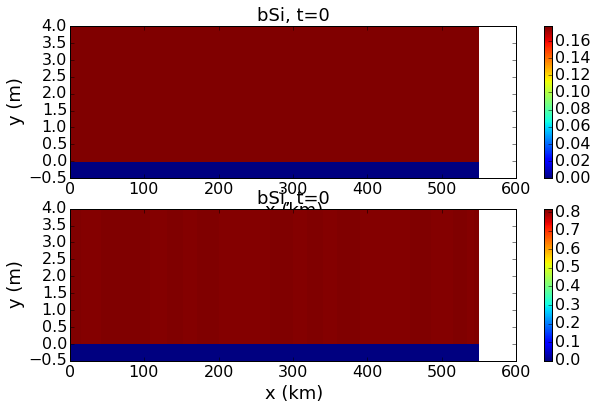

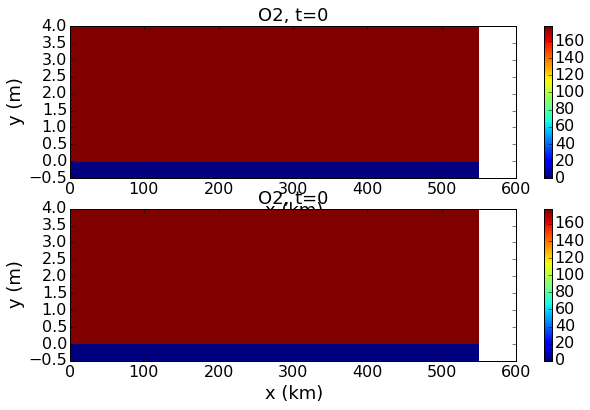

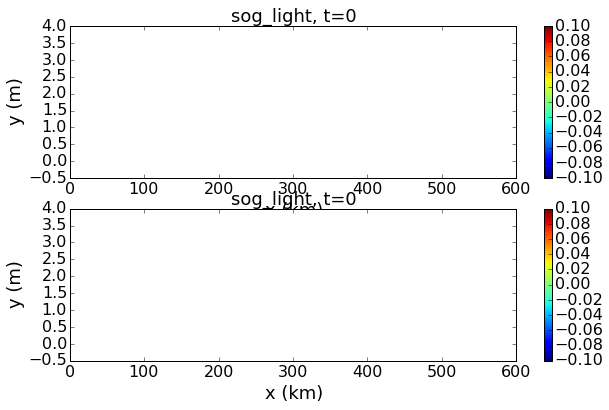

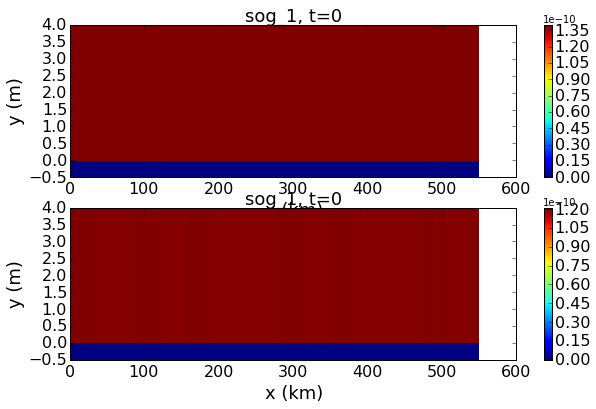

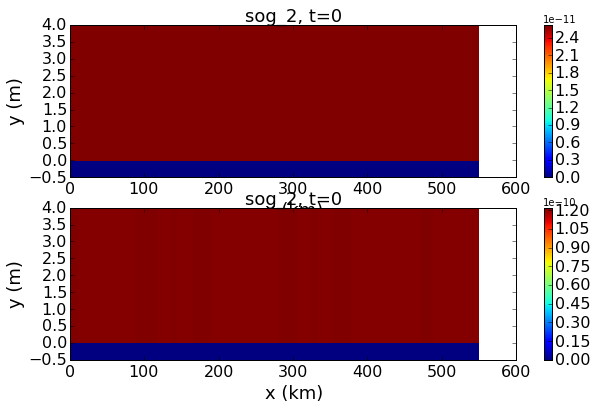

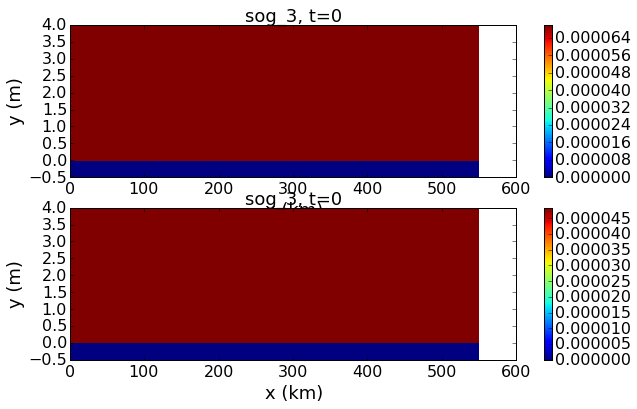

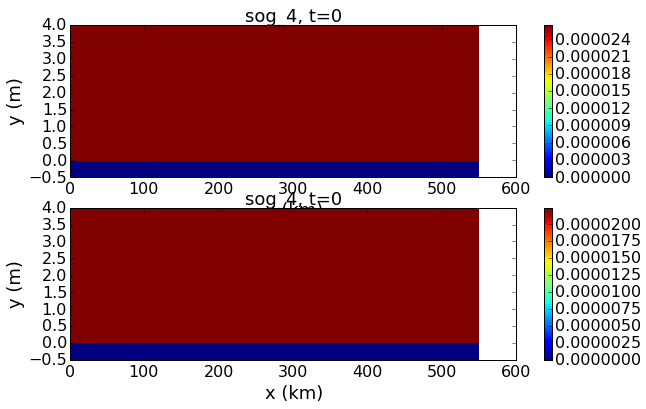

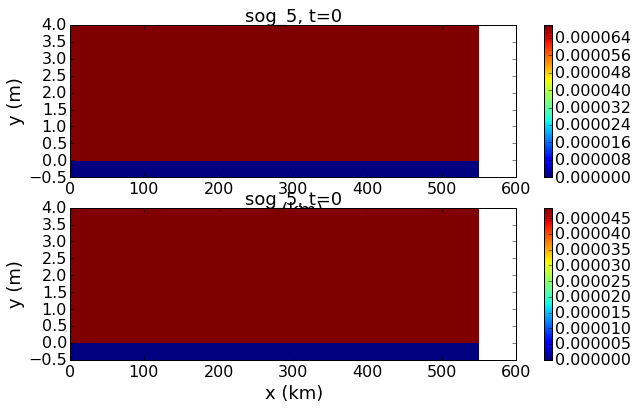

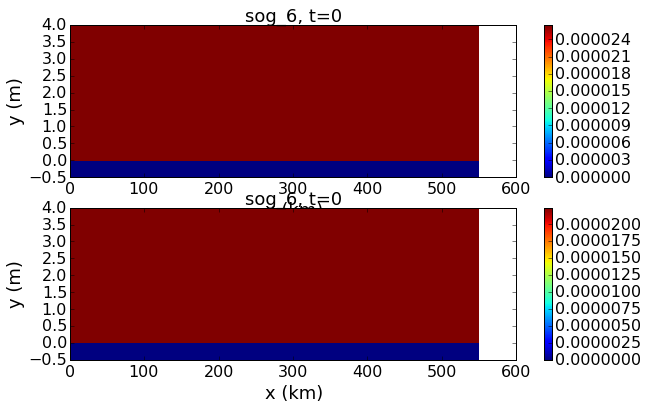

In [6]:
for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig, axs = plt.subplots(2,1,figsize=(10,6))
        mesh0=axs[0].pcolormesh(xt,yt,f.variables[ik][0,0,:,:])
        #,vmin=np.min(f.variables[ik][5,0,1:3,10:100]-10e-6), vmax=np.max(f.variables[ik][5,0,1:3,10:100]+10e-6)
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('y (m)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title(ik + ', t=0', fontsize=18)
        #axs[0].autoscale(tight='True')
        #axs[0].axis([0, 550, -150, 0])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)
                
        mesh1=axs[1].pcolormesh(xt,yt,f.variables[ik][e-1,0,:,:])
        #,vmin=np.min(f.variables[ik][e-1,0,1:3,10:100]-10e-6), vmax=np.max(f.variables[ik][e-1,0,1:3,10:100]+10e-6)
        cb1=fig.colorbar(mesh1,ax=axs[1])
        axs[1].set_ylabel('y (m)', fontsize=18)
        axs[1].set_xlabel('x (km)', fontsize=18)
        axs[1].set_title(ik + ', t=0', fontsize=18)
        #axs[0].autoscale(tight='True')
        #axs[1].axis([0, 550, 0.5, 4])
        plt.setp(axs[1].get_xticklabels(),fontsize=16)
        plt.setp(axs[1].get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)

NO3
0
-0.000119209
NH4
1
-3.57628e-07
Si
0
-0.000202179
PHY2
0
-7.15256e-07
PHY
0
-7.7486e-07
MYRI
0
-7.7486e-07
MICZ
0
-6.55651e-07
DOC
0
-6.89179e-08
POC
0
-1.3411e-07
bSi
0
-2.23517e-07
O2
47
0.0
sog_light
0
--
sog_1
0
-2.56739e-15
sog_2
0
-5.3256e-16
sog_3
0
-8.87667e-10
sog_4
0
-1.9827e-10
sog_5
0
-9.09495e-10
sog_6
0
-2.01908e-10


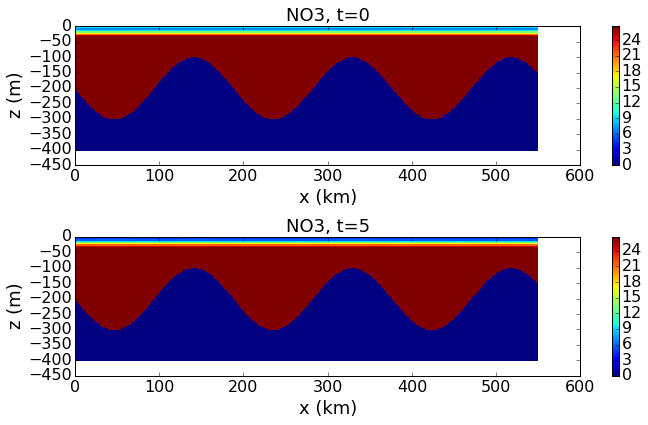

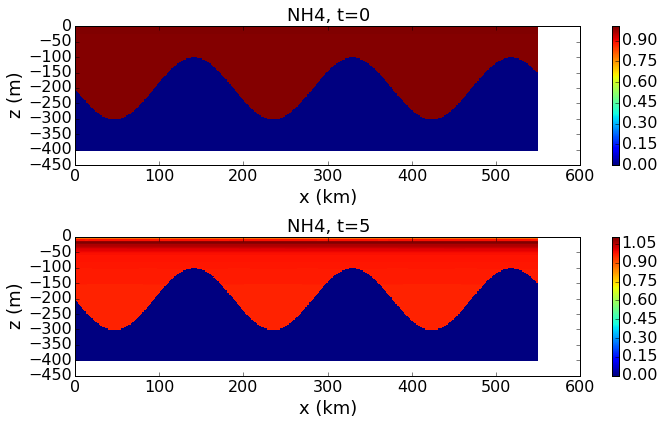

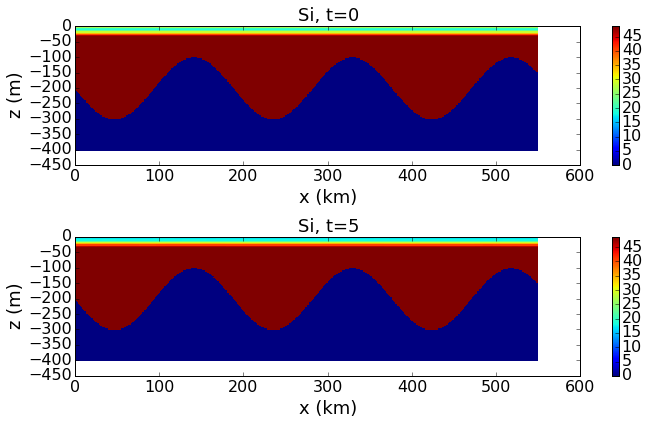

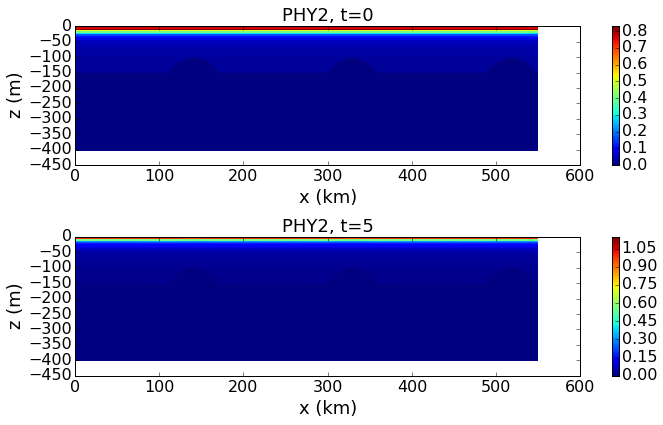

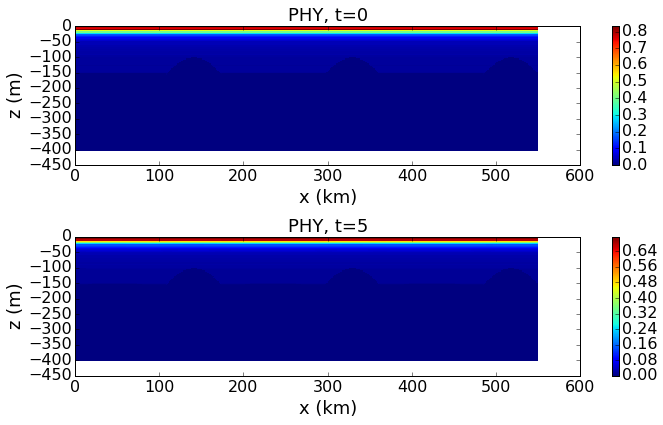

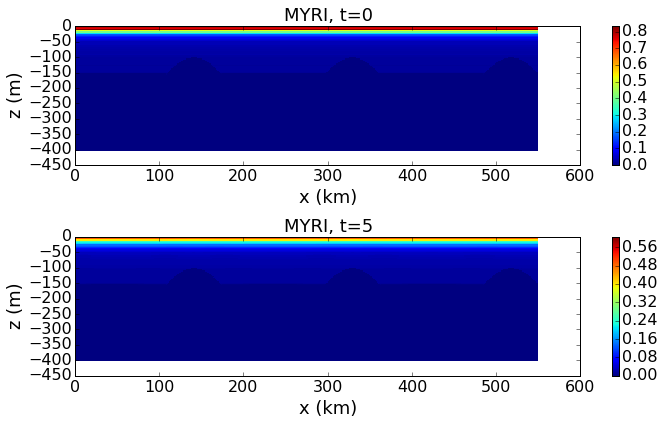

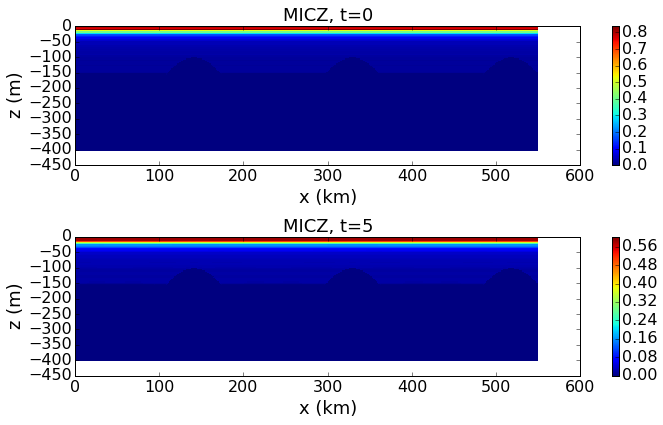

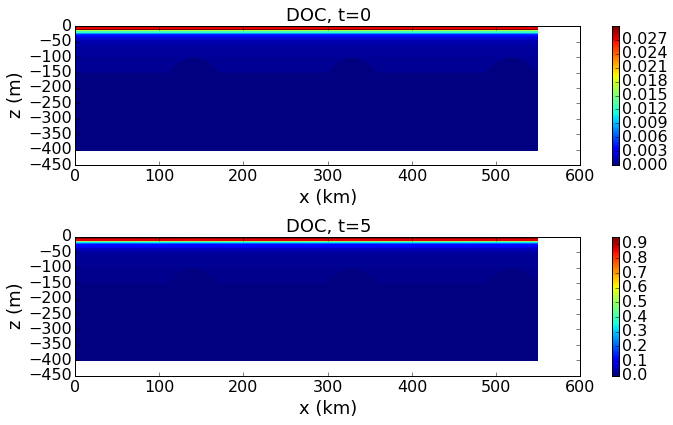

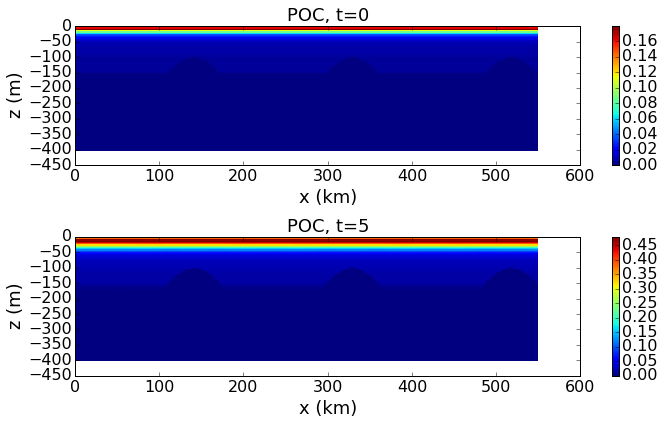

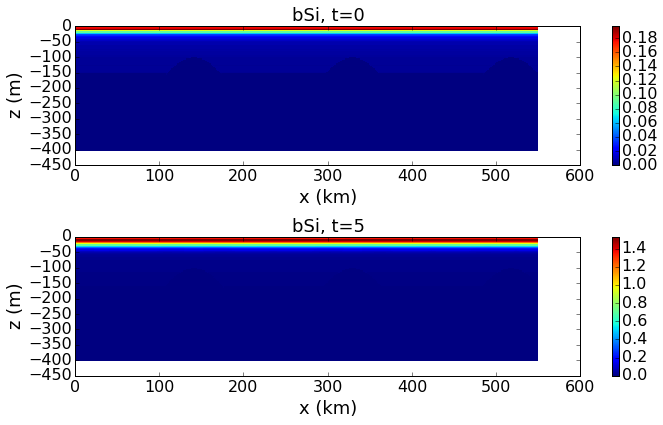

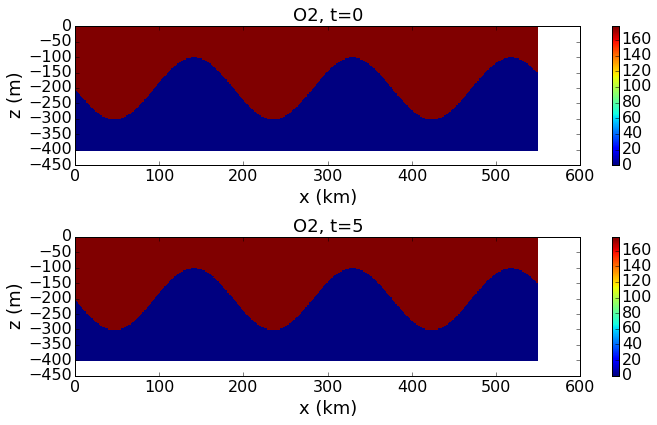

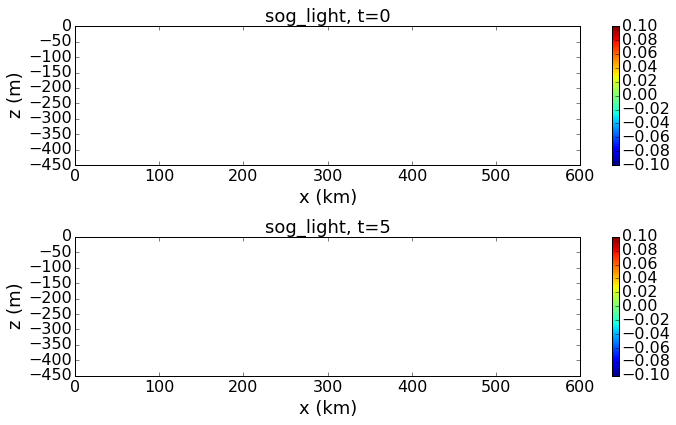

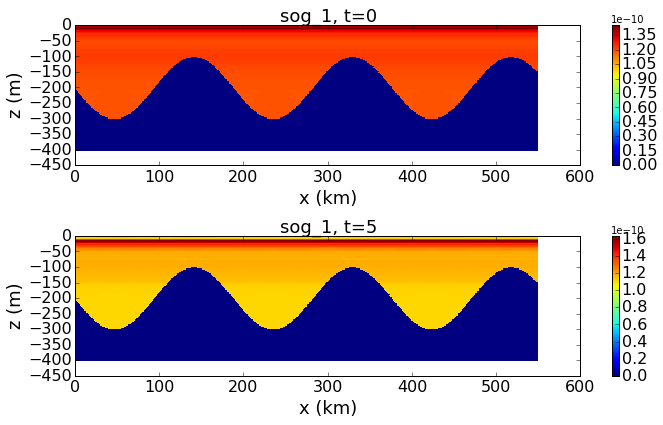

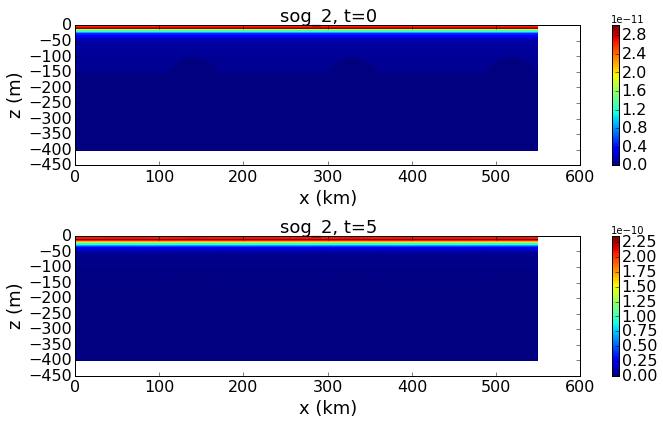

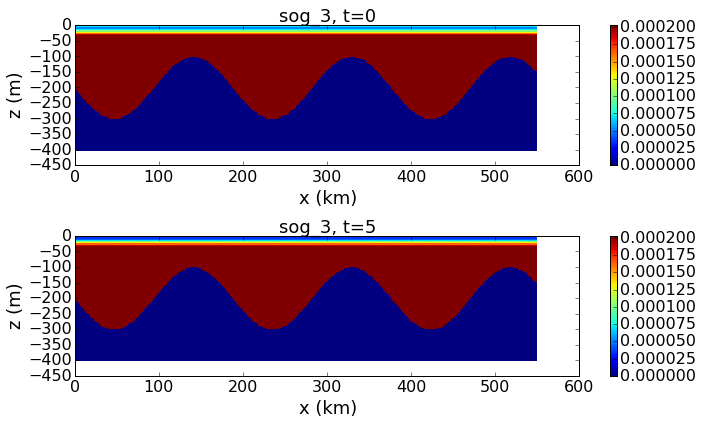

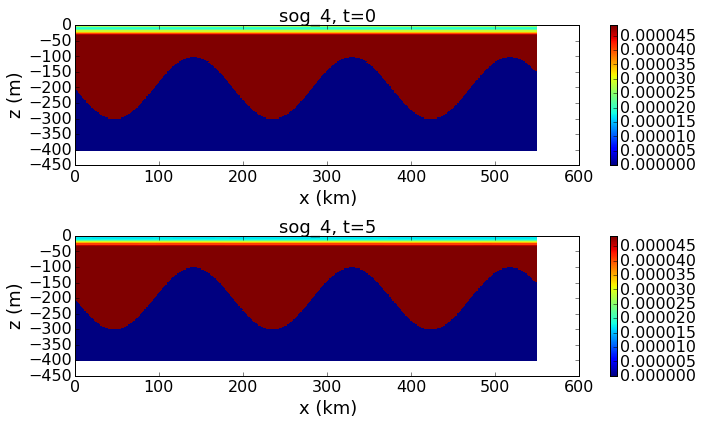

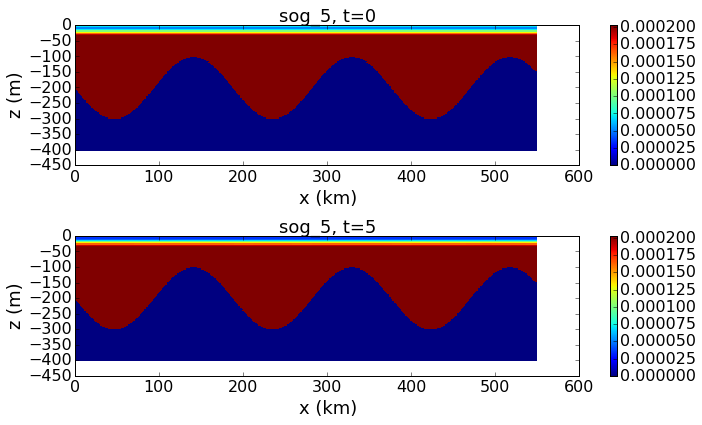

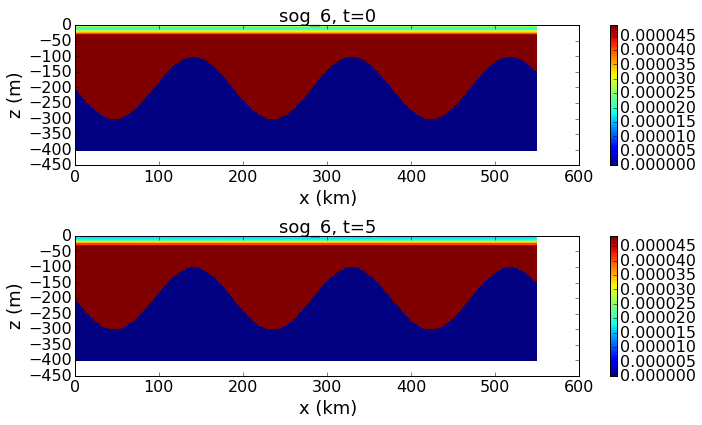

In [7]:
for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig, axs = plt.subplots(2,1,figsize=(10,6))
        print (ik)
        
        ti=0
        diff=np.min(f.variables[ik][ti,0,5,1:400])-np.max(f.variables[ik][ti,0,5,1:400])
        while (ti<e-1 and diff==0):
            ti=ti+1
            diff=np.min(f.variables[ik][ti,0,5,1:400])-np.max(f.variables[ik][ti,0,5,1:400])
        print(ti)
        print(diff)
        
        mesh0=axs[0].pcolormesh(xx,zz,f.variables[ik][0,:,5,:]*f3.variables['tmask'][0,:,5,:])
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('z (m)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title(ik + ', t=0', fontsize=18)
        #axs[0].autoscale(tight='True')
        #axs[0].axis([0, 550, -150, 0])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)

        mesh1=axs[1].pcolormesh(xx,zz,f.variables[ik][e-1,:,5,:]*f3.variables['tmask'][0,:,5,:])
        #-f.variables[ik][0,:,5,:]*f3.variables['tmask'][0,:,5,:]
        cb1=fig.colorbar(mesh1,ax=axs[1])
        axs[1].set_ylabel('z (m)', fontsize=18)
        axs[1].set_xlabel('x (km)', fontsize=18)
        axs[1].set_title(ik + ', t=5', fontsize=18)
        #axs[1].autoscale(tight='True')
        #axs[1].axis([0, 550, -150, 0])
        plt.setp(axs[1].get_xticklabels(),fontsize=16)
        plt.setp(axs[1].get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)
        plt.tight_layout()

In [8]:
np.min(f.variables['NH4'])

0.0

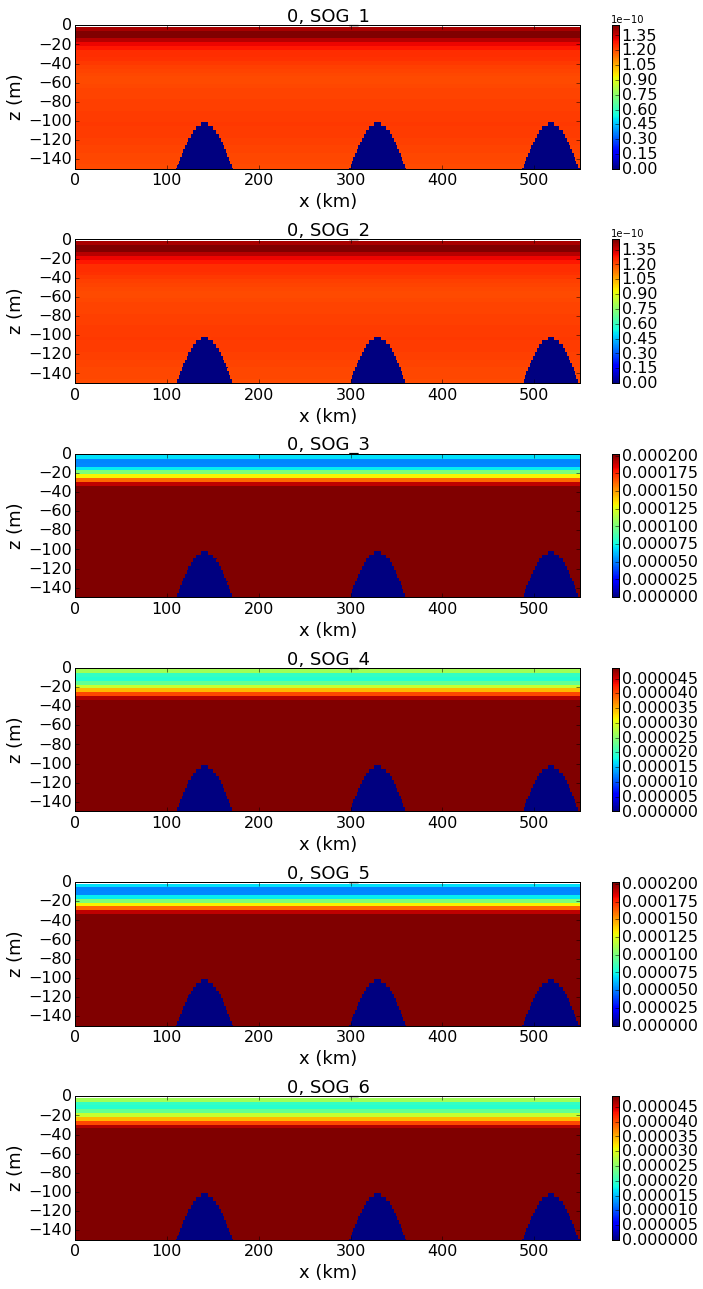

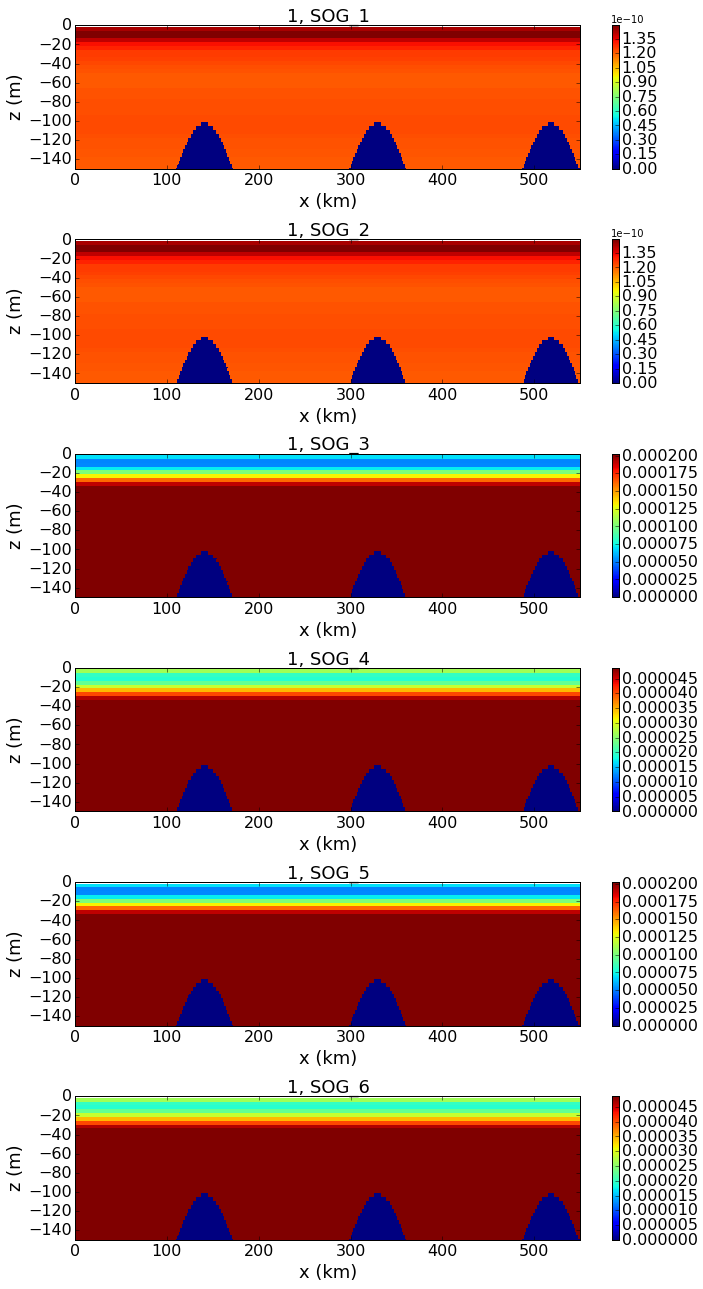

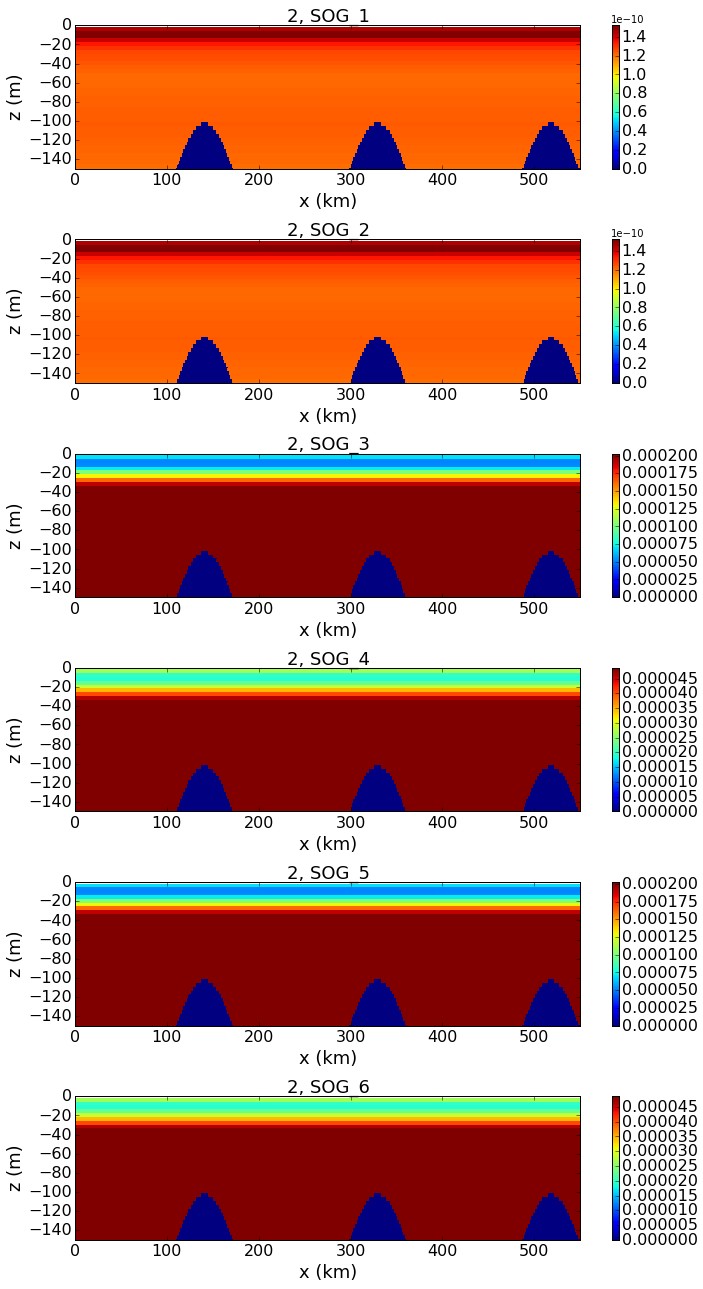

In [9]:
for ik in range(0,3):

        fig, axs = plt.subplots(6,1,figsize=(10,18))
        
        mesh0=axs[0].pcolormesh(xx,zz,f.variables['sog_1'][ik,:,5,:]*f3.variables['tmask'][0,:,5,:])
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('z (m)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title(str(ik) + ', SOG_1', fontsize=18)
        #axs[0].autoscale(tight='True')
        axs[0].axis([0, 550, -150, 0])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)

        mesh1=axs[1].pcolormesh(xx,zz,f.variables['sog_1'][ik,:,5,:]*f3.variables['tmask'][0,:,5,:])
        cb1=fig.colorbar(mesh1,ax=axs[1])
        axs[1].set_ylabel('z (m)', fontsize=18)
        axs[1].set_xlabel('x (km)', fontsize=18)
        axs[1].set_title(str(ik) + ', SOG_2', fontsize=18)
        #axs[1].autoscale(tight='True')
        axs[1].axis([0, 550, -150, 0])
        plt.setp(axs[1].get_xticklabels(),fontsize=16)
        plt.setp(axs[1].get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)
        plt.tight_layout()
        
        mesh2=axs[2].pcolormesh(xx,zz,f.variables['sog_3'][ik,:,5,:]*f3.variables['tmask'][0,:,5,:])
        cb2=fig.colorbar(mesh2,ax=axs[2])
        axs[2].set_ylabel('z (m)', fontsize=18)
        axs[2].set_xlabel('x (km)', fontsize=18)
        axs[2].set_title(str(ik) + ', SOG_3', fontsize=18)
        #axs[2].autoscale(tight='True')
        axs[2].axis([0, 550, -150, 0])
        plt.setp(axs[2].get_xticklabels(),fontsize=16)
        plt.setp(axs[2].get_yticklabels(),fontsize=16)
        cb2.ax.tick_params(labelsize=16)

        mesh3=axs[3].pcolormesh(xx,zz,f.variables['sog_4'][ik,:,5,:]*f3.variables['tmask'][0,:,5,:])
        cb3=fig.colorbar(mesh3,ax=axs[3])
        axs[3].set_ylabel('z (m)', fontsize=18)
        axs[3].set_xlabel('x (km)', fontsize=18)
        axs[3].set_title(str(ik) + ', SOG_4', fontsize=18)
        #axs[3].autoscale(tight='True')
        axs[3].axis([0, 550, -150, 0])
        plt.setp(axs[3].get_xticklabels(),fontsize=16)
        plt.setp(axs[3].get_yticklabels(),fontsize=16)
        cb3.ax.tick_params(labelsize=16)
        plt.tight_layout()
        
        mesh4=axs[4].pcolormesh(xx,zz,f.variables['sog_5'][ik,:,5,:]*f3.variables['tmask'][0,:,5,:])
        cb4=fig.colorbar(mesh4,ax=axs[4])
        axs[4].set_ylabel('z (m)', fontsize=18)
        axs[4].set_xlabel('x (km)', fontsize=18)
        axs[4].set_title(str(ik) + ', SOG_5', fontsize=18)
        #axs[4].autoscale(tight='True')
        axs[4].axis([0, 550, -150, 0])
        plt.setp(axs[4].get_xticklabels(),fontsize=16)
        plt.setp(axs[4].get_yticklabels(),fontsize=16)
        cb4.ax.tick_params(labelsize=16)

        mesh5=axs[5].pcolormesh(xx,zz,f.variables['sog_6'][ik,:,5,:]*f3.variables['tmask'][0,:,5,:])
        cb5=fig.colorbar(mesh5,ax=axs[5])
        axs[5].set_ylabel('z (m)', fontsize=18)
        axs[5].set_xlabel('x (km)', fontsize=18)
        axs[5].set_title(str(ik) + ', SOG_6', fontsize=18)
        #axs[5].autoscale(tight='True')
        axs[5].axis([0, 550, -150, 0])
        plt.setp(axs[5].get_xticklabels(),fontsize=16)
        plt.setp(axs[5].get_yticklabels(),fontsize=16)
        cb5.ax.tick_params(labelsize=16)
        plt.tight_layout()

In [10]:
ti=4
var='NO3'
print(np.min(f.variables[var][ti,0,5,1:400]))
print(np.max(f.variables[var][ti,0,5,1:400]))
print(np.min(f.variables[var][ti,0,5,1:400])-np.max(f.variables[var][ti,0,5,1:400]))
for p in range(0,400): print(f.variables[var][ti,0,5,p])

9.20801
9.20976
-0.00174332
0.0
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20974
9.20971
9.20973
9.20975
9.20974
9.20972
9.20973
9.20975
9.20975
9.20975
9.20975
9.20975
9.20975
9.20974
9.20968
9.20965
9.20959
9.2095
9.20949
9.20947
9.20944
9.20921
9.20896
9.20892
9.20895
9.20879
9.2088
9.20887
9.20885
9.20873
9.2087
9.20863
9.20849
9.20867
9.20881
9.20873
9.20855
9.20849
9.20837
9.20828
9.20837
9.20841
9.20833
9.20823
9.20818
9.20816
9.20814
9.20813
9.20814
9.20819
9.20821
9.20818
9.20812
9.20808
9.20806
9.20803
9.20801
9.20808
9.2083
9.20846
9.20842
9.20829
9.20839
9.20851
9.20852
9.20862
9.20866
9.20871
9.20862
9.20863
9.20871
9.20884
9.20895
9.20902
9.20888
9.2089
9.20901
9.20896
9.208

In [11]:
ti=4
var='vosaline'
print(np.min(f2.variables[var][ti,0,5,1:400]))
print(np.max(f2.variables[var][ti,0,5,1:400]))
print(np.min(f2.variables[var][ti,0,5,1:400])-np.max(f2.variables[var][ti,0,5,1:400]))
for p in range(0,400): print(f2.variables[var][ti,0,5,p])

22.8166
22.8203
-0.00364113
0.0
22.8168
22.8168
22.8169
22.8169
22.8171
22.8172
22.8173
22.8175
22.8177
22.8179
22.818
22.8182
22.8184
22.8185
22.8187
22.8188
22.8188
22.8188
22.8188
22.8189
22.8189
22.819
22.8191
22.8191
22.8191
22.8191
22.8191
22.8191
22.8192
22.8192
22.8192
22.8193
22.8193
22.8193
22.8194
22.8194
22.8194
22.8195
22.8195
22.8195
22.8194
22.8195
22.8195
22.8194
22.8194
22.8194
22.8195
22.8196
22.8195
22.8192
22.8191
22.819
22.819
22.8188
22.8187
22.8185
22.8182
22.8179
22.8176
22.8175
22.8176
22.8175
22.8177
22.8175
22.8173
22.8173
22.8173
22.8173
22.8172
22.8171
22.8169
22.8169
22.8167
22.8167
22.8167
22.8167
22.8167
22.8167
22.8167
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8167
22.8166
22.8166
22.8167
22.8167
22.8166
22.8166
22.8166
22.8166
22.8166
22.8166
22.8167
22.8167
22.8168
22.8168
22.8171
22.8177
22.8175
22.8175
22.8

In [12]:
print(f.variables['sog_1'][0,0,5,49])
print(f.variables['sog_1'][1,0,5,49])
print(f.variables['sog_1'][0,5,5,49])

1.39947e-10
1.43214e-10
1.28516e-10


In [13]:
print(f2.variables['votemper'][0,0,5,49])
print(f2.variables['votemper'][1,0,5,49])
print(f2.variables['votemper'][0,5,5,49])

12.0612
12.0616
10.9357
